In [1]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [2]:
clf.predict([[2., 2.]])

array([1])

In [4]:
## plot the decision tree
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None, 
                         feature_names=["x1", "x2"],  
                         class_names=["0", "1"],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

10
DecisionTreeClassifier(max_features='sqrt', random_state=44753436)


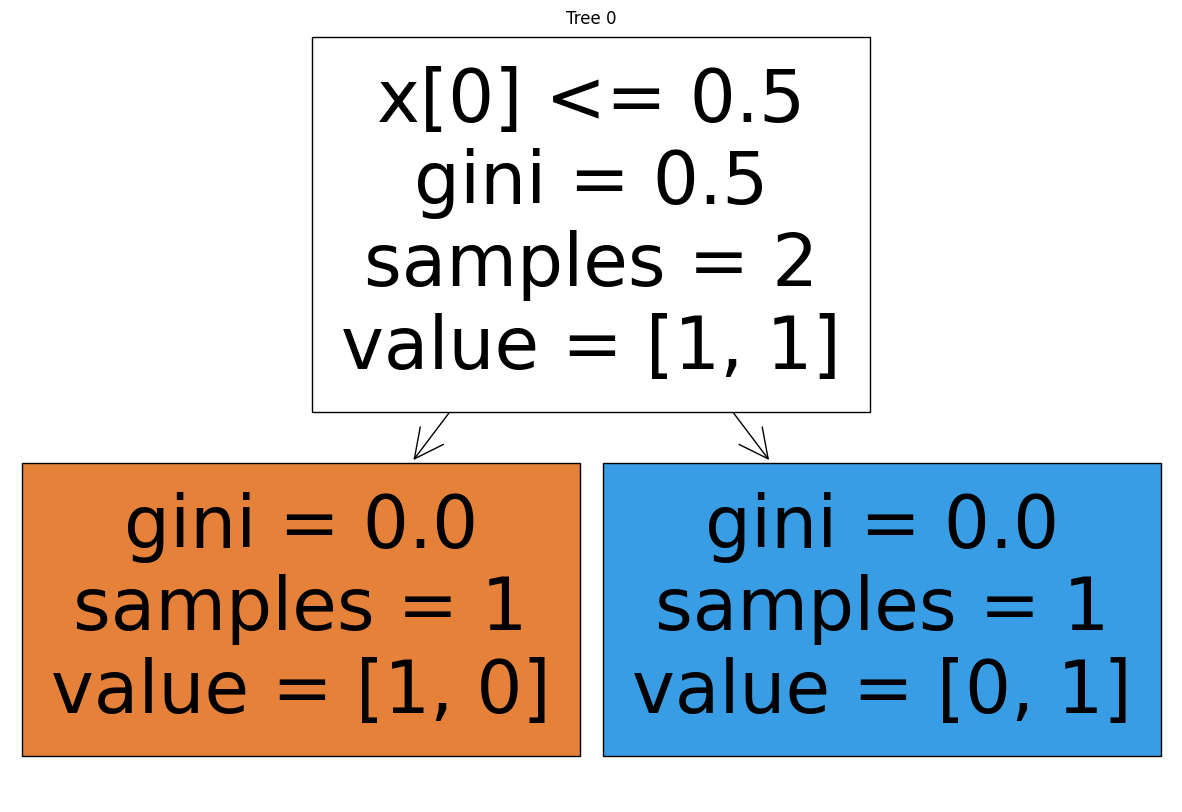

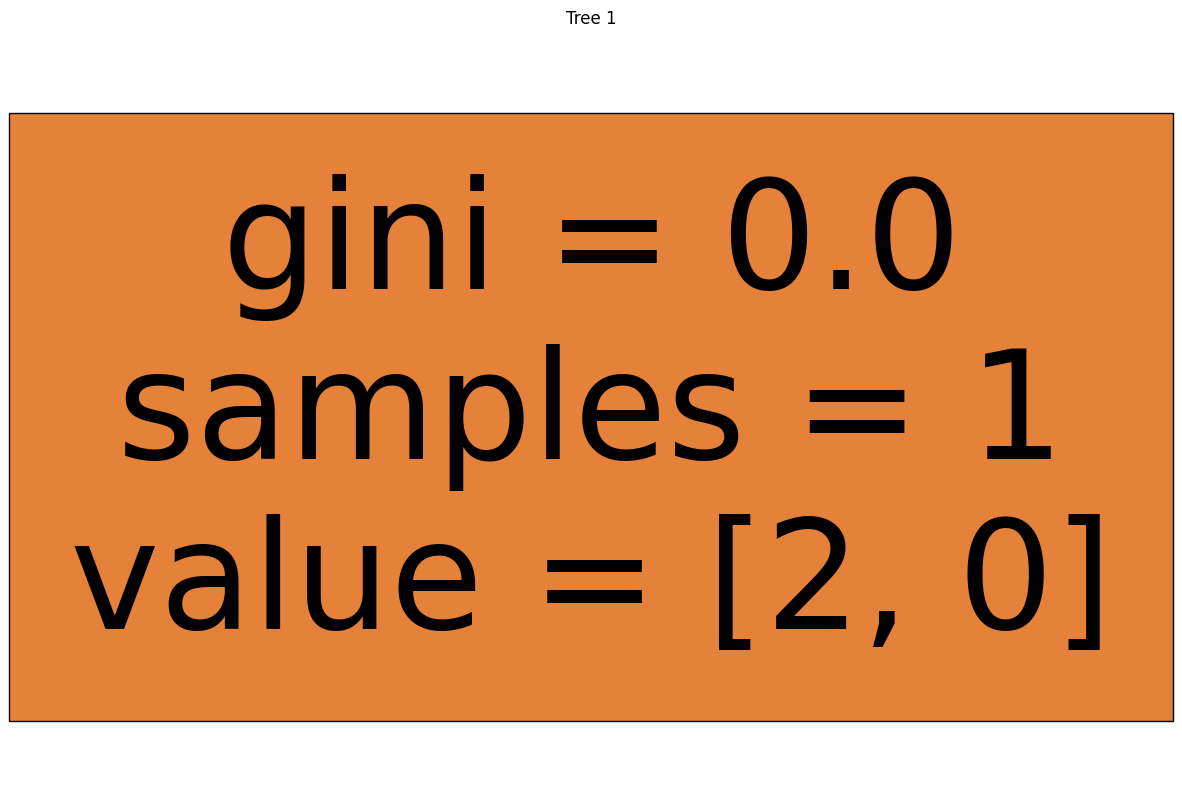

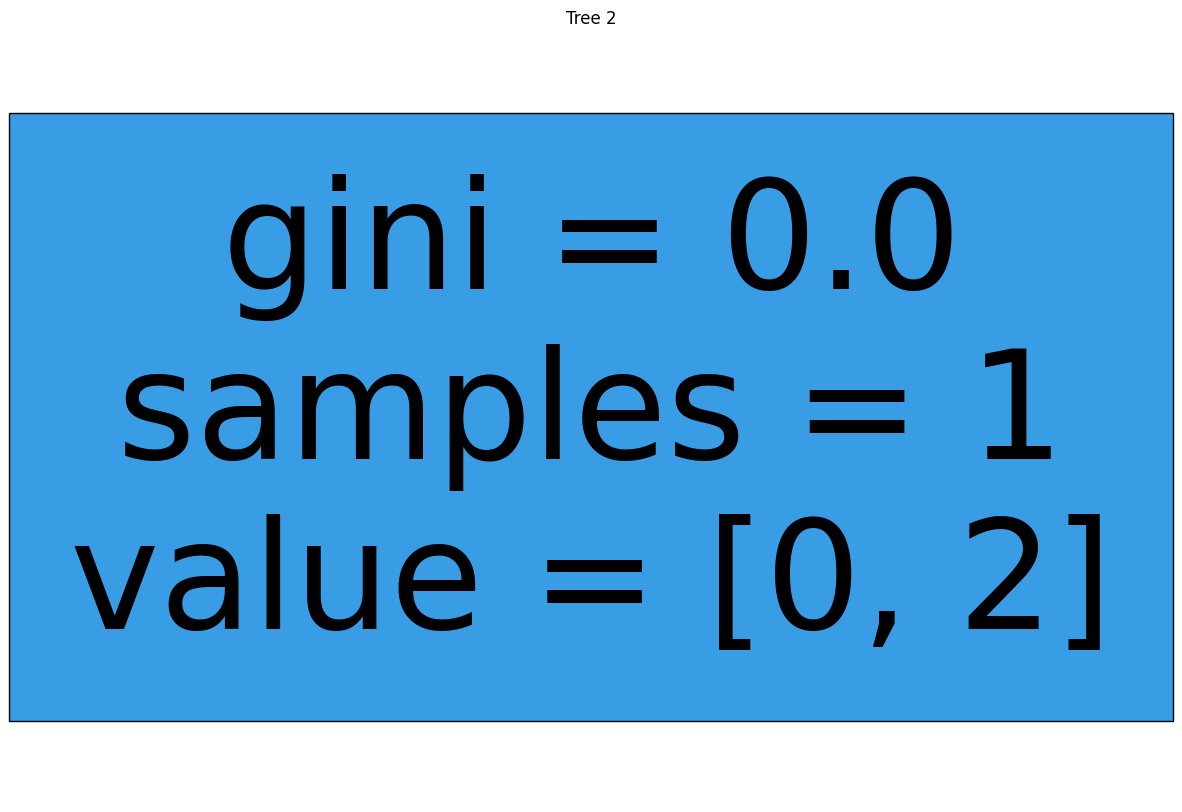

In [9]:
estimators = clf.estimators_
print(len(estimators))  # Number of trees
print(estimators[0])  # First tree

# Plot the first few trees
for tree_idx, tree in enumerate(estimators):  # Only looking at the first class
    fig, ax = plt.subplots(figsize=(15, 10))
    plot_tree(tree, ax=ax, filled=True)
    plt.title(f'Tree {tree_idx}')
    plt.show()

    if tree_idx == 2:  # Just as an example, stop after 3 trees
        break